In [ ]:
pip install torch torchvision pillow matplotlib

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
  Using cached nvidia_nvjitlink_cu12-12.4.127-py3-none-m

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install numpy matplotlib keras

Visualizing feature maps for: /content/drive/MyDrive/weaponD/dataset /AR_gun4.jpg
1/1 [==============================] - 1s 672ms/step


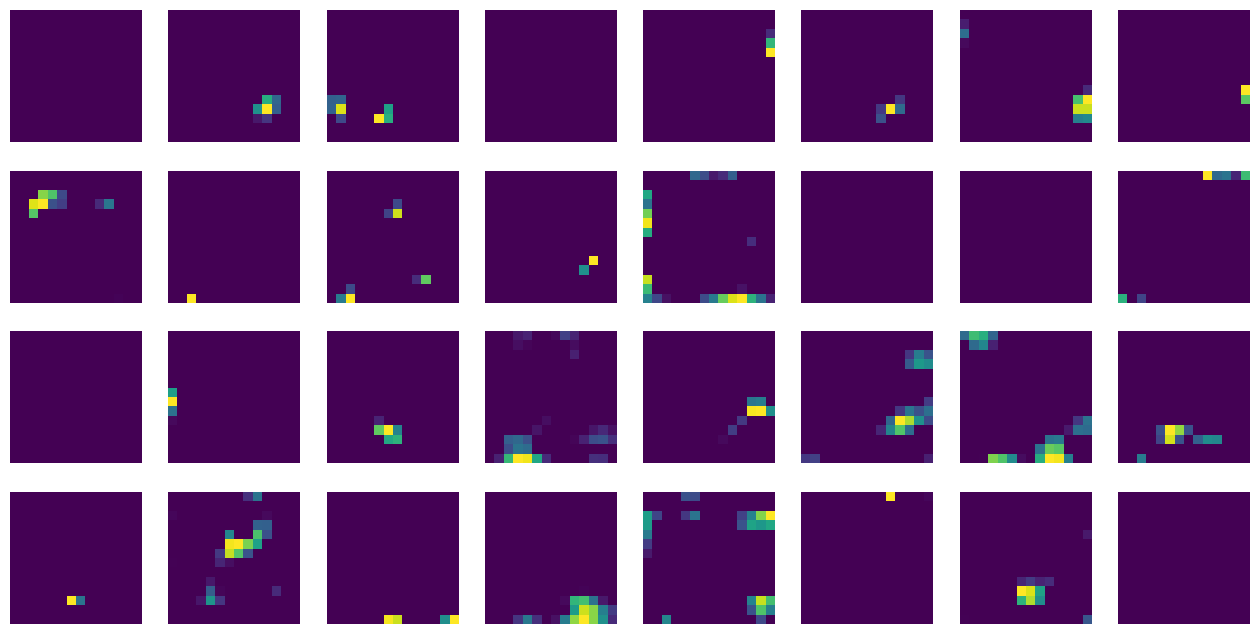

Visualizing feature maps for: /content/drive/MyDrive/weaponD/dataset /Handgun_3.jpg
1/1 [==============================] - 1s 550ms/step


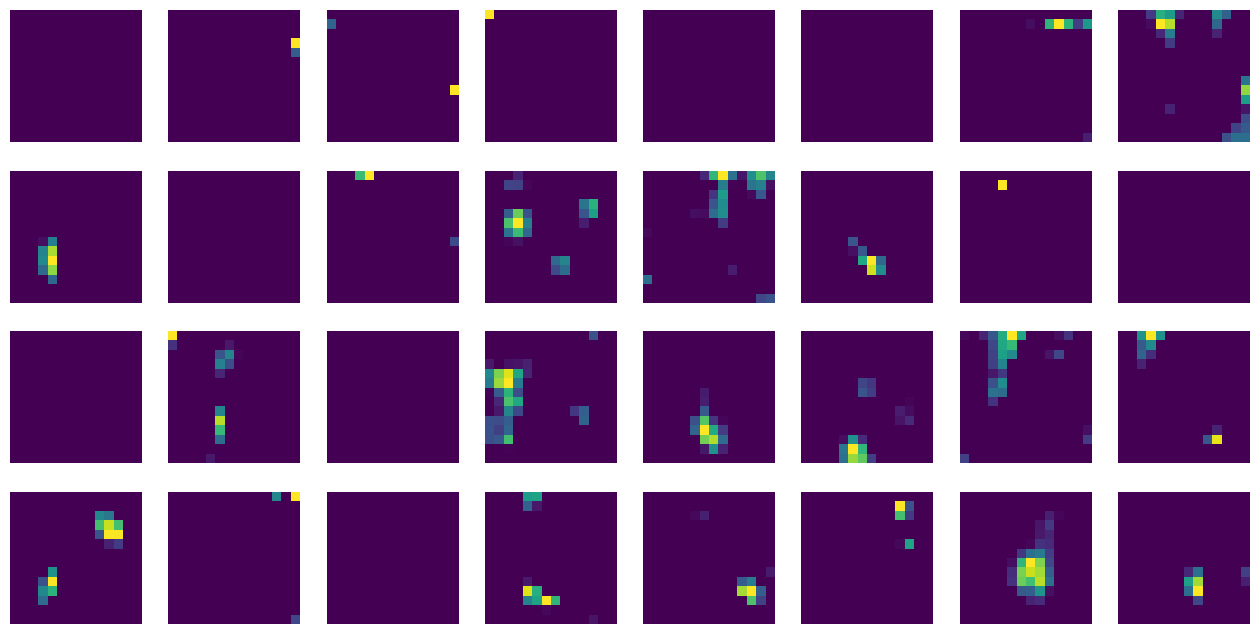

Visualizing feature maps for: /content/drive/MyDrive/weaponD/dataset /Handgun_19.jpg
1/1 [==============================] - 1s 538ms/step


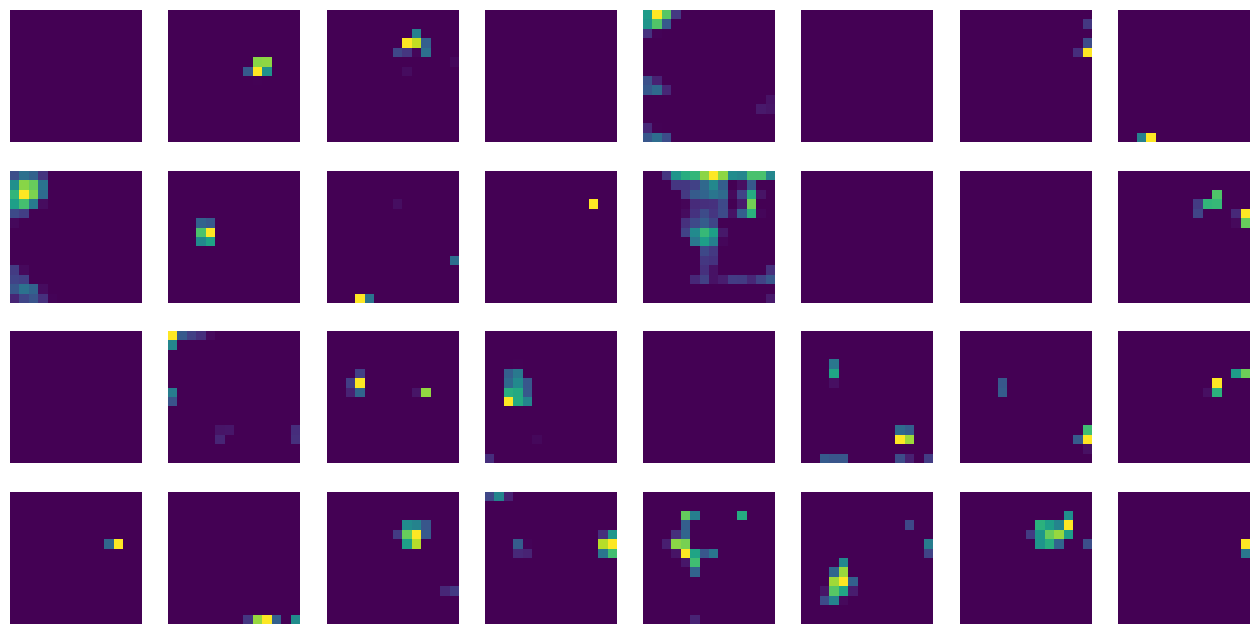

Visualizing feature maps for: /content/drive/MyDrive/weaponD/dataset /Handgun_20.jpg
1/1 [==============================] - 1s 789ms/step


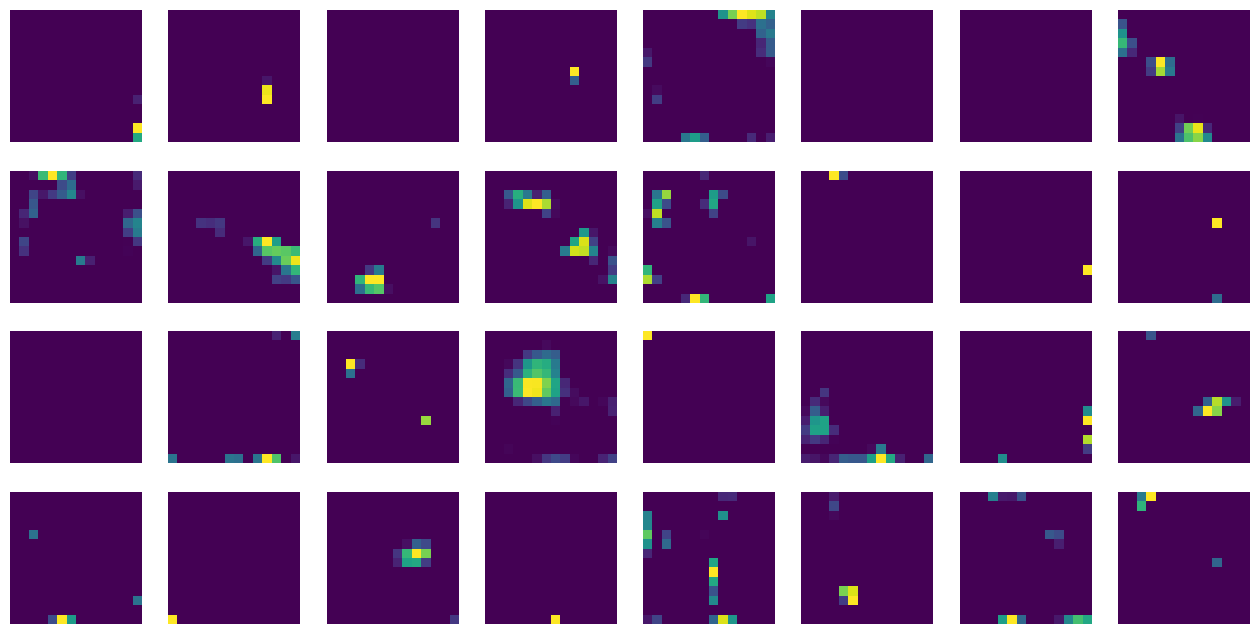

Visualizing feature maps for: /content/drive/MyDrive/weaponD/dataset /sword.jpg
1/1 [==============================] - 1s 555ms/step


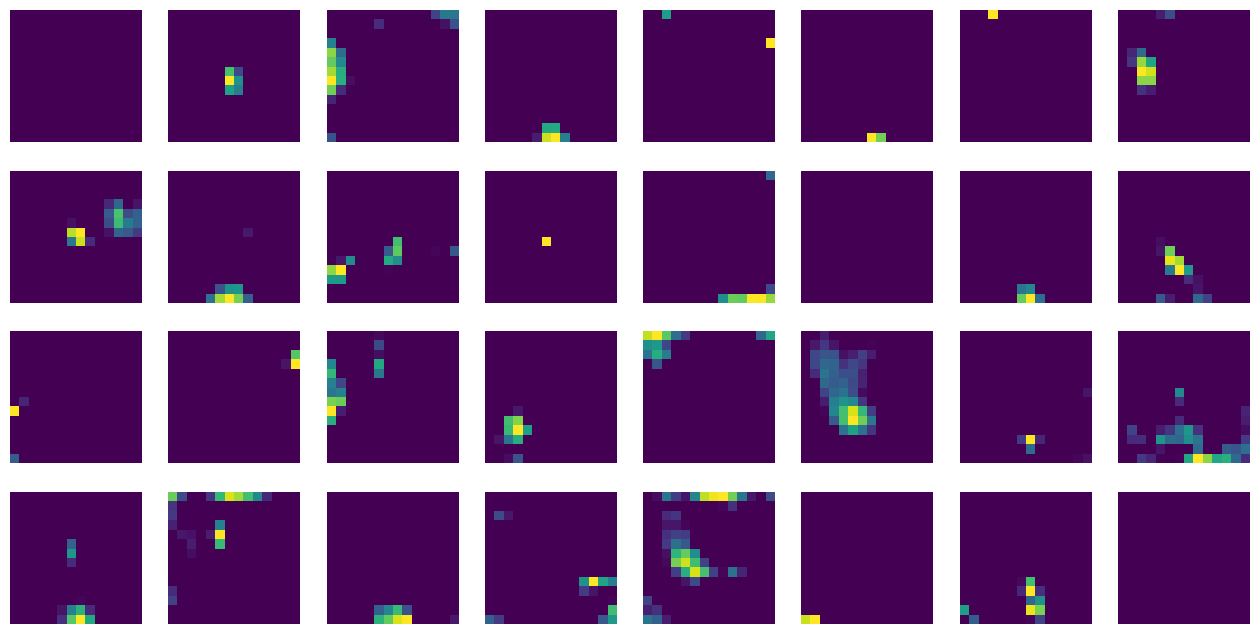

Visualizing feature maps for: /content/drive/MyDrive/weaponD/dataset /knife 1.jpg
1/1 [==============================] - 1s 534ms/step


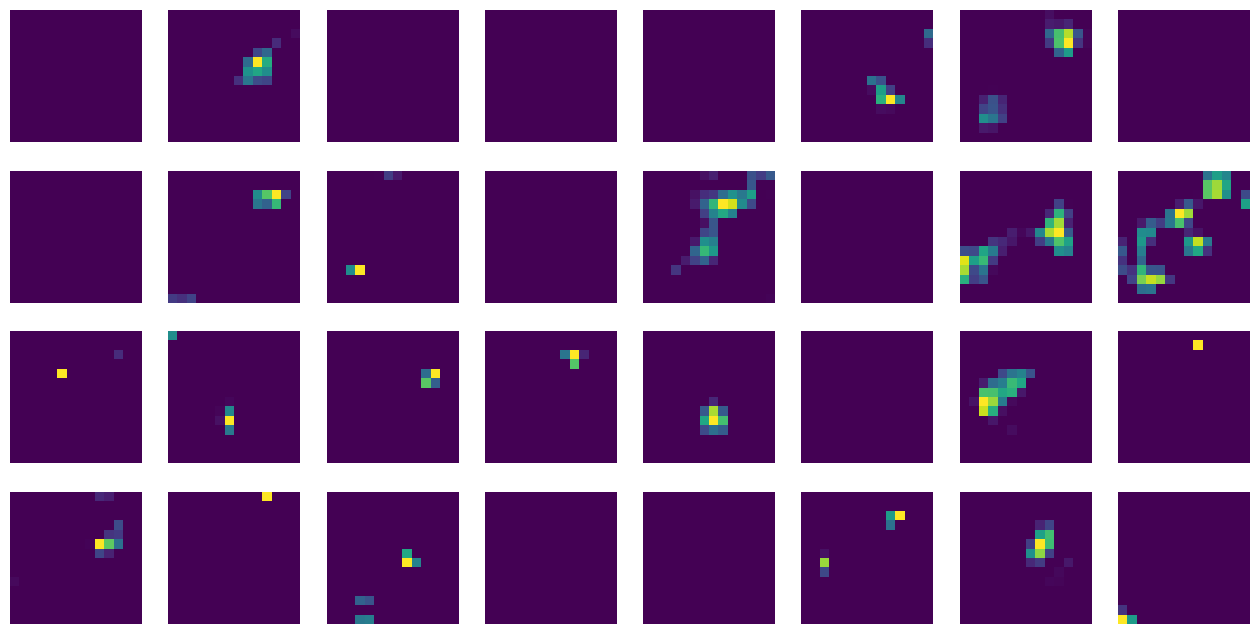

Visualizing feature maps for: /content/drive/MyDrive/weaponD/dataset /sword2.jpg
1/1 [==============================] - 1s 627ms/step


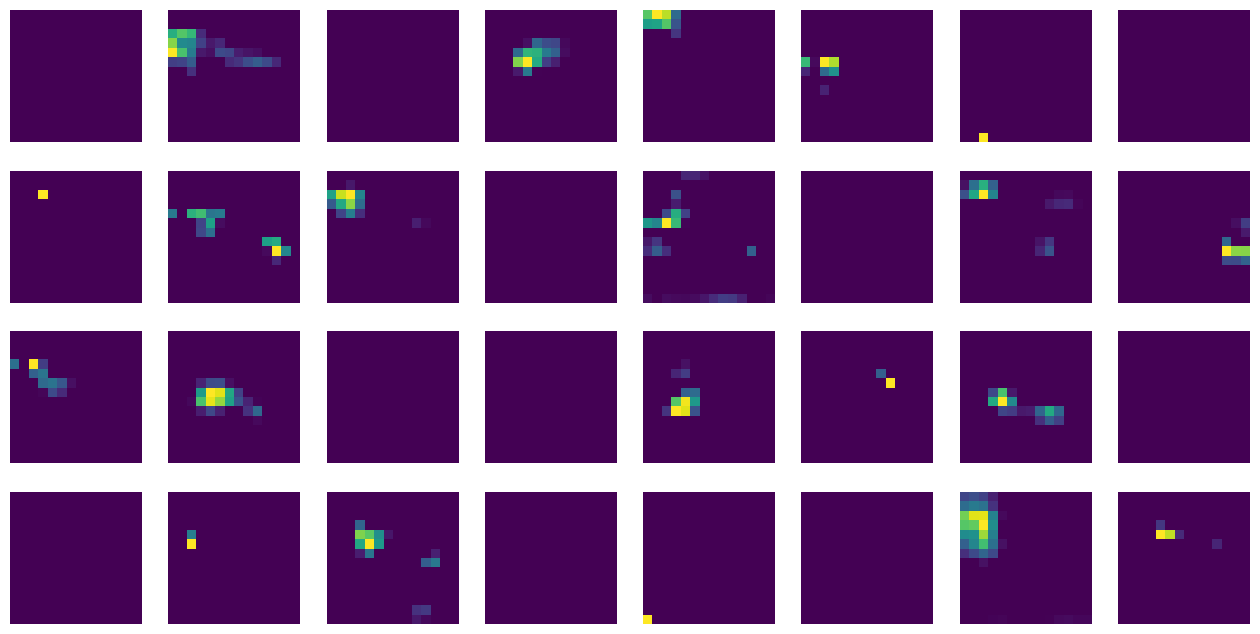

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing import image
from keras.applications import VGG16
from keras.models import Model
from keras.applications.vgg16 import preprocess_input

# Load pre-trained VGG16 model
base_model = VGG16(weights='imagenet', include_top=True)
model = Model(inputs=base_model.input, outputs=base_model.get_layer('block5_conv3').output)

# Function to extract features and visualize feature maps
def visualize_feature_maps(image_path):
    # Load and preprocess the image
    img = image.load_img(image_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)

    # Extract features
    features = model.predict(x)

    # Visualize feature maps
    plt.figure(figsize=(16, 8))
    for i in range(32):
        plt.subplot(4, 8, i+1)
        plt.imshow(features[0,:,:,i], cmap='viridis')
        plt.axis('off')
    plt.show()

# Directory containing the images
image_dir = '/content/drive/MyDrive/weaponD/dataset '

# Visualize feature maps for each image in the directory
for filename in os.listdir(image_dir):
    if filename.endswith(".jpg") or filename.endswith(".png"):
        image_path = os.path.join(image_dir, filename)
        print("Visualizing feature maps for:", image_path)
        visualize_feature_maps(image_path)